# Case Study: Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

df = df.sample(frac=0.1, random_state=10)

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [2]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
30001,Apple iPhone 5c 32GB (Blue) - AT&T,Apple,274.95,5,What an upgrade compared to the iPhone 4. Goin...,7.0
313198,Samsung Galaxy Grand Prime DUOS G531H/DS - Gra...,Samsung,179.99,4,I liked it at first but is starting to lag alr...,0.0
138219,"BLU Studio 5.0 C HD Unlocked Cellphone, White",BLU,2000.00,4,very nice,0.0
66571,Apple iPhone 6s 64 GB International Warranty U...,Apple,689.95,1,It is not a new one. The tagboard on the box w...,0.0
109303,BLU Dash J Unlocked Phone - Retail Packaging -...,BLU,39.99,1,This phone was truly a terrible purchase!! It ...,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41384 entries, 394349 to 109303
Data columns (total 6 columns):
Product Name    41384 non-null object
Brand Name      34846 non-null object
Price           40762 non-null float64
Rating          41384 non-null int64
Reviews         41374 non-null object
Review Votes    40194 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [5]:
df.describe()

,Price,Rating,Review Votes
count,40762.000000,41384.000000,40194.000000
mean,227.626005,3.815170,1.498109
std,276.992862,1.551391,8.452564
min,1.730000,1.000000,0.000000
25%,79.950000,3.000000,0.000000
50%,140.000000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2408.730000,5.000000,524.000000


In [6]:
df.dropna(inplace=True)
df = df[df['Rating'] != 3]

df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0,0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0,1
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0,0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0,1
277158,Nokia N8 Unlocked GSM Touch Screen Phone Featu...,Nokia,95.00,5,I fell in love with this phone because it did ...,0.0,1
100311,Blackberry Torch 2 9810 Unlocked Phone with 1....,BlackBerry,77.49,5,I am pleased with this Blackberry phone! The p...,0.0,1
251669,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,"Great product, best value for money smartphone...",0.0,1
279878,OtterBox 77-29864 Defender Series Hybrid Case ...,OtterBox,9.99,5,I've bought 3 no problems. Fast delivery.,0.0,1
406017,Verizon HTC Rezound 4G Android Smarphone - 8MP...,HTC,74.99,4,Great phone for the price...,0.0,1
302567,"RCA M1 Unlocked Cell Phone, Dual Sim, 5Mp Came...",RCA,159.99,5,My mom is not good with new technoloy but this...,4.0,1


In [7]:
df['Positively Rated'].mean()

0.74717766860786672

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [9]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Everything about it is awesome!


X_train shape:  (23052,)


# CountVectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)

In [11]:
vect.get_feature_names()[::2000]

['00',
 'arroja',
 'comapañias',
 'dvds',
 'golden',
 'lands',
 'oil',
 'razonable',
 'smallsliver',
 'tweak']

In [12]:
len(vect.get_feature_names())

19601

In [13]:

X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<23052x19601 sparse matrix of type '<class 'numpy.int64'>'
	with 613289 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.897433277667


In [16]:

feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'terrible' 'slow' 'junk' 'poor' 'sucks' 'horrible' 'useless'
 'waste' 'disappointed']

Largest Coefs: 
['excelent' 'excelente' 'excellent' 'perfectly' 'love' 'perfect' 'exactly'
 'great' 'best' 'awesome']


# Visualization

In [17]:
import matplotlib.pyplot as plt

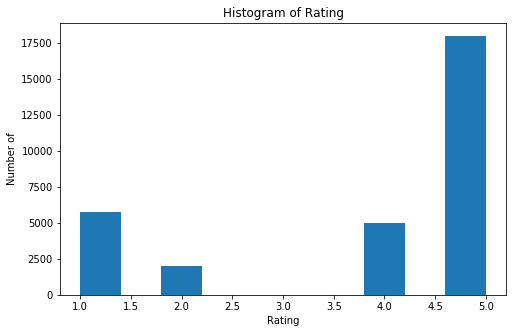

In [18]:
df['Rating'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Rating') # add a title to the histogram
plt.ylabel('Number of') # add y-label
plt.xlabel('Rating') # add x-label

plt.show()

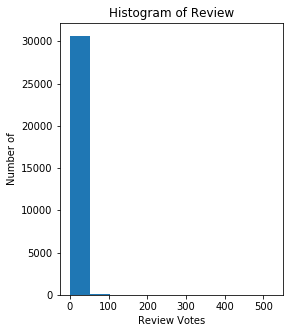

In [19]:
df['Review Votes'].plot(kind='hist', figsize=(4,5 ))

plt.title('Histogram of Review') # add a title to the histogram
plt.ylabel('Number of') # add y-label
plt.xlabel('Review Votes') # add x-label

plt.show()

# Tfidf

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

5442

In [21]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.889951006492


In [22]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['61' 'printer' 'approach' 'adjustment' 'consequences' 'length' 'emailing'
 'degrees' 'handsfree' 'chipset']

Largest tfidf: 
['unlocked' 'handy' 'useless' 'cheat' 'up' 'original' 'exelent' 'exelente'
 'exellent' 'satisfied']


In [23]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'slow' 'disappointed' 'worst' 'terrible' 'never' 'return' 'doesn'
 'horrible' 'waste']

Largest Coefs: 
['great' 'love' 'excellent' 'good' 'best' 'perfect' 'price' 'awesome' 'far'
 'perfectly']


In [24]:

print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams

In [25]:

vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

29072

In [26]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.91106617946


In [27]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'poor' 'slow' 'worst' 'broken' 'not good' 'terrible'
 'defective' 'horrible']

Largest Coefs: 
['excellent' 'excelente' 'excelent' 'perfect' 'great' 'love' 'awesome'
 'no problems' 'good' 'best']


In [28]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [29]:
print(model.predict(vect.transform(['phone is working smoothly , performance is good',
                                    'no issue, phone is working'])))

[1 1]
